In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mnist import load_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
train, validation, test = load_mnist()

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


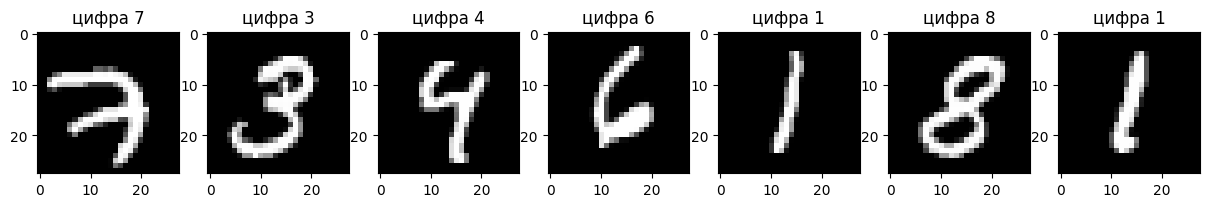

In [10]:
fig, axis = plt.subplots(1, 7, figsize = (15,15))
for i in range(7):
    axis[i].imshow(train[0][i], cmap = 'gray')
    axis[i].set_title('цифра ' + str(train[1][i]))

In [11]:
train[0].shape

(55000, 28, 28, 1)

#### Алгоритм PCA

In [21]:
class my_PCA(): 
    def __init__(self, n_components = None): 
        self.n_components = n_components
     
    def fit(self, X): 
        X1 = np.zeros((28,28))
        X1[:,:] = X[:,:,0]
        AverageValue = np.mean(X1, axis = 0)
        X1 -= AverageValue 
        C = X1.T.dot(X1)
        Lambda, F = np.linalg.eigh(C)
        Lambda = Lambda[::-1]
        F = F[:, ::-1]
        return X1, F, Lambda
     
    def transform(self, X, F): 
        Y = X.dot(F)
        return Y
     
    def fit_transform(self, X):
        X_c, F, Lambda = self.fit(X)
        Y = self.transform(X_c, F)
        if self.n_components != None:
            Y = Y[:, :(self.n_components)]
        return Y

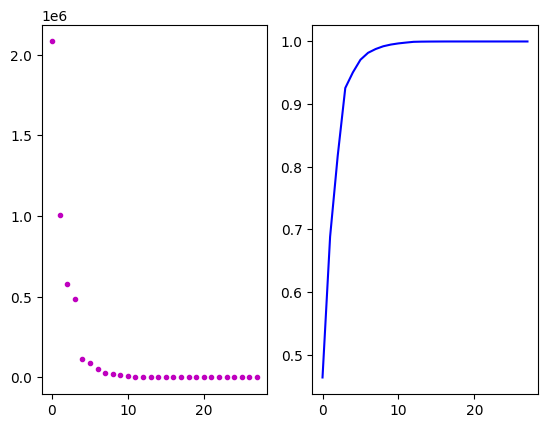

In [22]:
test = my_PCA(2)
X1, F, Lambda = test.fit(train[0][0])
plt.subplot(1,2,1)
plt.plot(Lambda, marker = '.', linestyle = '', color = 'm')
plt.subplot(1,2,2)
plt.plot(np.cumsum(Lambda) / np.sum(Lambda), color = 'b')